<div style="text-align: center;">
    <h1>AI Project 1</h1>
</div>

<div style="text-align: center;">
    Farbod Azimmohseni 810100187
</div>

In the first place we need to transform our _curve fitting_ problem into a _genetic algorithm_ problem.The goal is to choose coefficients in a way that minimizes the distance between input points and the found polynomial.
_Numpy_ library is included and vectorization is used instead of _for_ loops whenever possible to increase the speed of algorithm.

In [22]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# Inputs
The inputs for this problem include the order of the polynomial, the range of coefficient intervals, and multiple points on the polynomial. Additionally, several parameters of the algorithm need to be set, such as the number of populations, the fitness function, the crossover chance, and the mutation chance.

In this notebook, we will discuss the impact of population size and mutation chance on the speed of solving the problem.

In [23]:
order_of_polynomial = 2
number_of_chromosomes = 1000
number_of_points = 3


def calc_poly(coeficiont,x):
    result = 0
    for i,co in enumerate(coeficiont):
        result += (co* (x**i))
    return result
# initial_points = np.random.rand(number_of_points,2)
# initial_points = [[random.randint(-5,5),random.randint(-5,5)] for i in range(number_of_points)]
# initial_points = [[(random.random()*50)-25,(random.random()*50)-25] for i in range(number_of_points)]
poly_coefs = [random.randint(-5,5) for i in range(order_of_polynomial+1)]
x_s = [(random.random())-0.5 for i in range(number_of_points)]
y_s = [calc_poly(poly_coefs,x_s[i]) for i in range(number_of_points)]
# initial_points = [[x_s[i],y_s[i]] for i in range(number_of_points)]
initial_points = np.array([
    [0, 1],
    [-1, 0],
    [1, 5],
])

# Zero Generation

First population is generated randomely where each coefficient is a gene and a chromosomes form all coefficients of the polynomial. Function _generateinitialgeneration_ returns 2D _numpy_ array with shape
(numberofchromosomes,numberofgenes)


In [24]:
def generate_initial_generation(number_of_genes,n_chroms,gene_ranges):
    zero_gen = np.zeros((n_chroms,number_of_genes))
    for i in range(n_chroms):
        zero_gen[i,:] = np.array([[random.randint(gene_ranges[j][0],gene_ranges[j][1]) for j in range(number_of_genes)]])
    return zero_gen


# Setting Fitness Function

<img src="diffplot.png" width="400" height="300">

Fitness function is calculated as follow:
 
<img src="fitness.png">







In [25]:

        
def polynomial_out(generation,poly_order,x):
    x_s = np.array([x**i for i in range(poly_order+1)])
    x_s = np.reshape(x_s,(poly_order+1,1))
    res = np.matmul(generation,x_s)
    result = np.reshape(res,(1,generation.shape[0]))
    return result
        




def fitness_function(generation,points,n_of_chromes,poly_order):  
    res = np.zeros((1,generation.shape[0]))
    for i in range(len(points)):
        res += np.power(polynomial_out(generation,poly_order,points[i][0]) -points[i][1],2) 
    error =[[res[0,i],i] for i in range(n_of_chromes)]
    error.sort()
    mean = np.sum(res)/n_of_chromes
    min = error[0][0]
    minarg = error[0][1]
    error.reverse()
    return error,mean,min,np.copy(generation[minarg])
            

# Chromosomes of next generation

In this step all chromosomes are ranked based on their fitness and a probability is assigned to them.Chromosomes are picked based on their probability. The number of chromosomes is the same in all generations.
Replacement is allowed.

 

In [26]:
def generate_chromosomes_for_next_gen(sorted_fitnesses,n_chrom,poly_order,chromosomes):
    new_chromosomes = np.zeros((n_chrom,poly_order+1))
    for i in range(n_chrom):
        rand = random.randint(1,((n_chrom*(n_chrom+1))//2))
        new_gen_chrome = sorted_fitnesses[(math.ceil((-1+math.sqrt(1+(8*rand)))/2))-1][1]
        new_chromosomes[i,:] = np.copy(chromosomes[new_gen_chrome,:])
    return new_chromosomes  

# Crossover

There are several methods for crossover such as One-point crossover and two point crossover.

In [27]:
crossover_chance = 0.6

def cross_over(generation):
    n_chromes,n_genes = generation.shape
    for i in range(n_chromes//2):
        rand = random.random()
        if rand <= crossover_chance:
            mid = n_genes//2
            temp1 = np.copy(generation[2*i,:mid])
            temp2 = np.copy(generation[2*i,mid:])
            rand2 = random.randint(0,1)
            if rand2 == 0:
                generation[2*i,:mid] =np.copy(generation[(2*i)+1,:mid])
                generation[(2*i)+1,:mid] = temp1
            else :
                generation[2*i,mid:] = np.copy(generation[(2*i)+1,mid:])
                generation[(2*i)+1,mid:] = temp2
    return generation
    

# mutation


Mutation makes sure that we can explore for better answers and helps us not to get stuck in a local minimum or maximum.


In [28]:

def mutate(generation,gen_ranges,mutate_chance):
    n_chromes,n_genes = generation.shape
    for i in range(n_chromes):
        rand = random.random()
        if rand <= mutate_chance:
            rand2 = random.randint(0,n_genes-1)
            generation[i,rand2] = random.randint(gen_ranges[rand2][0],gen_ranges[rand2][1])
    return generation



        
                

# Running Algorithm
Now we are ready to run the algorithm. Genetic algorithm continues until it converges or it reaches maximum number of steps.


fitness in itr0, mean:959.769, min:14.0


fitness in itr50, mean:270.88, min:1.0
fitness in itr100, mean:254.362, min:1.0
fitness in itr150, mean:234.518, min:1.0
fitness in itr200, mean:263.324, min:1.0
fitness in itr250, mean:260.698, min:1.0
fitness in itr300, mean:251.8, min:1.0
fitness in itr350, mean:245.783, min:1.0
fitness in itr400, mean:229.474, min:1.0
fitness in itr450, mean:234.15, min:1.0
[1. 3. 2.]


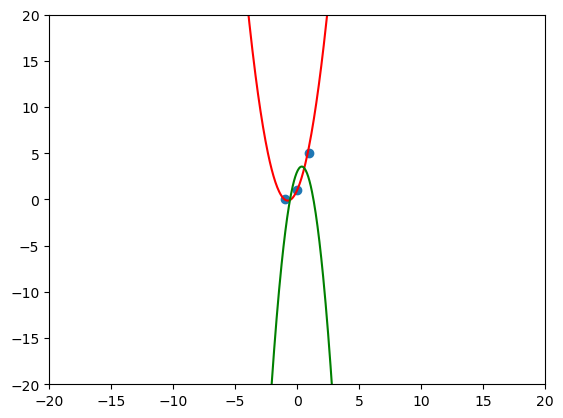

In [29]:


number_of_steps = 500
def GeneticAlgorithm(number_of_chromoes,mutate_chance,show_per_itr,points,poly_order,show_fitnees = True):
    mean_err_list = np.zeros((number_of_steps//show_per_itr,))
    min_err_list = np.zeros((number_of_steps//show_per_itr,))
    
    gene_ranges = [[-20,20] for i in range(poly_order+1)]
    generation = generate_initial_generation(poly_order+1,number_of_chromoes,gene_ranges)
    for i in range(number_of_steps):
        fitnesses,mean_er,min_er,best_coef =  fitness_function(np.copy(generation),np.copy(points),number_of_chromoes,poly_order)
        if i%show_per_itr == 0:
            if show_fitnees:
                print(f"fitness in itr{i}, mean:{round(mean_er,3)}, min:{round(min_er,3)}")
            mean_err_list[i//show_per_itr] = mean_er
            min_err_list[i//show_per_itr] = min_er
        
        generation = generate_chromosomes_for_next_gen(fitnesses,number_of_chromoes,poly_order,np.copy(generation))
        generation = cross_over(np.copy(generation))
        generation = mutate(np.copy(generation),gene_ranges.copy(),mutate_chance)
    return generation,mean_err_list,min_err_list,best_coef
_,_,_,best_coefficient = GeneticAlgorithm(number_of_chromosomes,0.5,50,initial_points,order_of_polynomial)
x_s = [initial_points[i][0] for i in range(len(initial_points))]
y_s = [initial_points[i][1] for i in range(len(initial_points))]
plt.scatter(x_s,y_s)
poly_points = np.arange(-40,40,0.05)
real_y_s =[calc_poly(poly_coefs,poly_points[i]) for i in range(len(poly_points))]
poly_y = [calc_poly(best_coefficient,x) for x in poly_points]
plt.plot(poly_points,poly_y,"red")
plt.plot(poly_points,real_y_s,"g")
plt.ylim(-20,20)
plt.xlim(-20,20)
plt.plot()
print(best_coefficient)

# Genetic algorithm with increasing population size 


In [30]:
def increase_population(generation, population_increase,gene_ranges,number_of_genes):
    new_population = np.zeros((population_increase,number_of_genes))
    for i in range(population_increase):
        new_population[i,:] = np.array([[random.randint(gene_ranges[j][0],gene_ranges[j][1]) for j in range(number_of_genes)]])  
    return np.concatenate((np.copy(generation),new_population),axis = 0)

    

fitness in itr0, mean:24797.227, min:93.0
fitness in itr50, mean:3190.662, min:1.0
fitness in itr100, mean:2824.283, min:1.0
fitness in itr150, mean:2978.89, min:1.0
fitness in itr200, mean:2917.25, min:1.0
fitness in itr250, mean:2627.5, min:1.0
fitness in itr300, mean:3026.527, min:1.0
fitness in itr350, mean:2454.932, min:1.0
fitness in itr400, mean:2620.158, min:1.0
fitness in itr450, mean:2480.863, min:1.0
fitness in itr500, mean:2678.453, min:1.0
fitness in itr550, mean:3015.494, min:1.0
fitness in itr600, mean:2751.479, min:1.0
fitness in itr650, mean:3010.521, min:1.0
fitness in itr700, mean:3003.772, min:1.0
fitness in itr750, mean:2841.645, min:1.0
fitness in itr800, mean:2879.539, min:1.0
fitness in itr850, mean:3311.264, min:1.0
fitness in itr900, mean:2774.371, min:1.0
fitness in itr950, mean:2573.071, min:1.0
fitness in itr1000, mean:2646.96, min:1.0
fitness in itr1050, mean:2607.835, min:1.0
fitness in itr1100, mean:3001.111, min:1.0
fitness in itr1150, mean:3153.169, mi

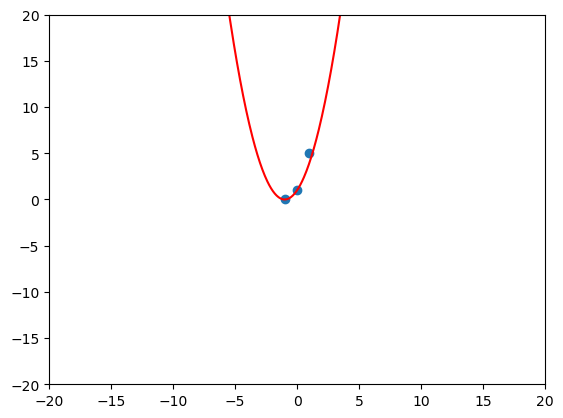

In [31]:


number_of_steps = 5000
increase_after_steps = 100
population_increase = 5
def GeneticAlgorithmWithPopulationIncrease(number_of_chromoes,mutate_chance,show_per_itr,points,poly_order,show_fitnees = True):
    mean_err_list = np.zeros((number_of_steps//show_per_itr,))
    min_err_list = np.zeros((number_of_steps//show_per_itr,))
    n_c = number_of_chromoes
    gene_ranges = [[-100,100] for i in range(poly_order+1)]
    generation = generate_initial_generation(poly_order+1,number_of_chromoes,gene_ranges)
    for i in range(number_of_steps):
        fitnesses,mean_er,min_er,best_coef =  fitness_function(np.copy(generation),np.copy(points),number_of_chromoes,poly_order)
        if i%show_per_itr == 0:
            if show_fitnees:
                print(f"fitness in itr{i}, mean:{round(mean_er,3)}, min:{round(min_er,3)}")
            mean_err_list[i//show_per_itr] = mean_er
            min_err_list[i//show_per_itr] = min_er
        generation = generate_chromosomes_for_next_gen(fitnesses,number_of_chromoes,poly_order,np.copy(generation))
        generation = cross_over(np.copy(generation))
        generation = mutate(np.copy(generation),gene_ranges.copy(),mutate_chance)
        if i % increase_after_steps == 0:
            generation = increase_population(generation,population_increase,gene_ranges,poly_order+1)
            n_c += population_increase
    return generation,mean_err_list,min_err_list,best_coef

_,_,generation,best_coefficient = GeneticAlgorithmWithPopulationIncrease(1000,0.3,50,initial_points,order_of_polynomial,True)
x_s = [initial_points[i][0] for i in range(len(initial_points))]
y_s = [initial_points[i][1] for i in range(len(initial_points))]
plt.scatter(x_s,y_s)
poly_points = np.arange(-20,20,0.05)

poly_y = [calc_poly(best_coefficient,x) for x in poly_points]
plt.plot(poly_points,poly_y,"red")
plt.ylim(-20,20)
plt.xlim(-20,20)
plt.plot()
print(best_coefficient)



# Plots and comparison

Affect of population is shown in the this plot

[]

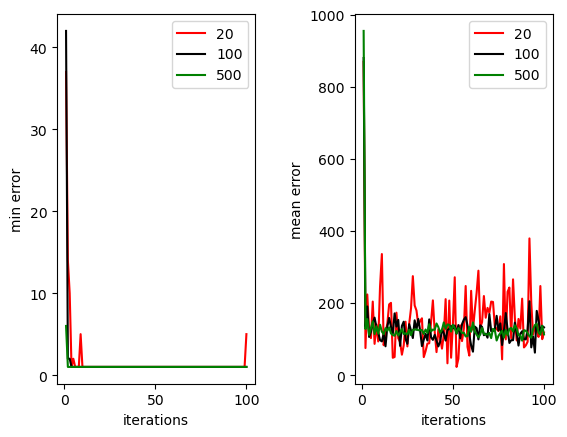

In [32]:

n_of_chromes = [20,100,500]
result_per_itr = 50


colors = ['red','black','green']
itrs = np.arange(1,(number_of_steps//result_per_itr)+1)
fig, (ax1, ax2) = plt.subplots(1, 2)
x_major_locator = MultipleLocator(50)  # Set the tick spacing to 1.0
ax1.legend("Mean Error")
ax2.legend("Min Error")
ax1.xaxis.set_major_locator(x_major_locator)
ax2.xaxis.set_major_locator(x_major_locator)
for i in range(len(n_of_chromes)):
    generation,mean_error_list,min_error_list,_ = GeneticAlgorithm(n_of_chromes[i],0.3,result_per_itr,initial_points,order_of_polynomial,show_fitnees=False)
    ax1.plot(itrs,min_error_list,colors[i])
    ax2.plot(itrs,mean_error_list,colors[i])
ax1.legend(['20','100','500'], loc = 'upper right')
ax2.legend(['20','100','500'], loc = 'upper right')
ax1.set_xlabel("iterations")
ax1.set_ylabel("min error")
ax2.set_xlabel("iterations")
ax2.set_ylabel("mean error")
plt.subplots_adjust(wspace= 0.5)
plt.plot()
plt.plot()




Min error converges really fast in all conditions. Diversity of higher population size makes min to converge faster. About the mean error, population with 20 chromosomes does not converge because it gives more mutated chromosomes will have chance to reach next generation. But this also gives our algorithm a chance to explore more options.
 

# Comparison for different mutation chances.




[]

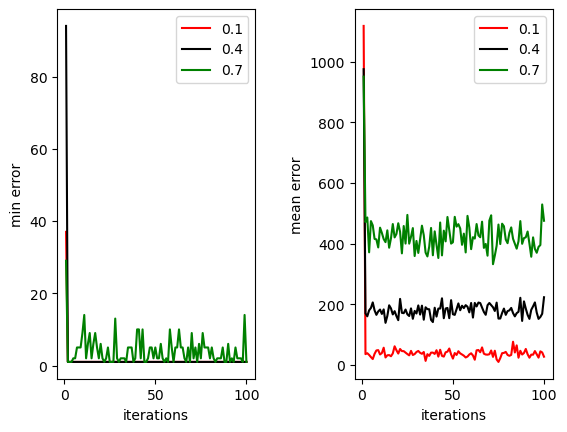

In [33]:
n_of_chromes = 200
mutation_chances = [0.1,0.4,0.7]
result_per_itr = 50


colors = ['red','black','green']
itrs = np.arange(1,(number_of_steps//result_per_itr)+1)
fig, (ax1, ax2) = plt.subplots(1, 2)
x_major_locator = MultipleLocator(50.0)  # Set the tick spacing to 1.0
ax1.legend("Mean Error")
ax2.legend("Min Error")
ax1.xaxis.set_major_locator(x_major_locator)
ax2.xaxis.set_major_locator(x_major_locator)
for i in range(len(mutation_chances)):
    generation,mean_error_list,min_error_list,_ = GeneticAlgorithm(n_of_chromes,mutation_chances[i],result_per_itr,initial_points,order_of_polynomial,show_fitnees=False)
    ax1.plot(itrs,min_error_list,colors[i])
    ax2.plot(itrs,mean_error_list,colors[i])
ax1.legend(['0.1','0.4','0.7'], loc = 'upper right')
ax2.legend(['0.1','0.4','0.7'], loc = 'upper right')
ax1.set_xlabel("iterations")
ax1.set_ylabel("min error")
ax2.set_xlabel("iterations")
ax2.set_ylabel("mean error")
plt.subplots_adjust(wspace= 0.5)
plt.plot()

#Questions


<font color='red'>1.</font>In a low population, lack of diversity can cause issues and denies our chance to explore new answers. Moreover, mutation affect is really significant. On the other hand computational cost is heavy in larger populations and low mutation chance may cause issues.

<font color='red'>2.</font>Speed of algorithm will obviously decrease. However the accuracy of algorithm will increase because we are adding to the diversity of population.

<font color='red'>3.</font>Above plots show the affect of mutation and crossover. Without mutation our algorithm lose the chance to explore and will converge too early. Without corssover our algorithm lose the chance to combine fit answers of different chromosomes.
Because of that, both operations are neccecary.

<font color='red'>4.</font> Because changing a coeficcient has a great affect in fitnesses it may be better that in mutation procces we only change the coeficiots by one and dont assign them random values. changing the mutation and crossover chance while algorithm running may also help. Also you can keep and reserve some part of population for the next generation.



<font color='red'>5.</font> The algorithm might get stuck on a local minimum. To fix this we can dynamically change mutation chance. We can also terminate and run with a new generation.

<font color='red'>6.</font>Setting maximum amount of steps or terminating the algorithm if our error doesnt change after some iterations.

<font color='red'>7.</font> Some mutation and crossover operations might increase time exponentialy. But each iteration in our algorithm increases it linearly.

<font color='red'>8.</font> It will increase run time of algorithm linearly.